# Code for sampling boards for experiment

In [93]:
import json
from itertools import combinations

import numpy as np
import pandas as pd

from battleship.fast_sampler import FastSampler
from battleship.board import Board

In [80]:
SHIP_LENGTHS = range(2, 6)
SHIP_LABELS = ["R", "G", "P", "O"]
BOARD_EMPTY = Board(np.full((8, 8), -1))
# SEED = 123 # pilot boards
SEED = 456 # final boards
N_BOARDS = 18

Board ID: 1
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 4 2 0 0 0]
 [0 0 0 4 2 0 0 0]
 [0 0 3 4 0 0 0 0]
 [0 1 3 0 0 0 0 0]
 [0 1 3 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]


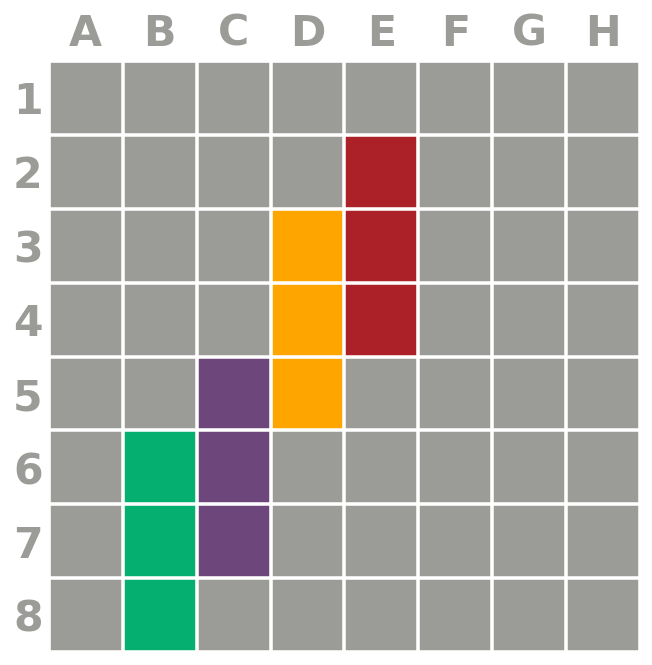

Board ID: 2
[[0 4 4 4 4 0 0 0]
 [0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 3 3 3 3 0 0 0]]


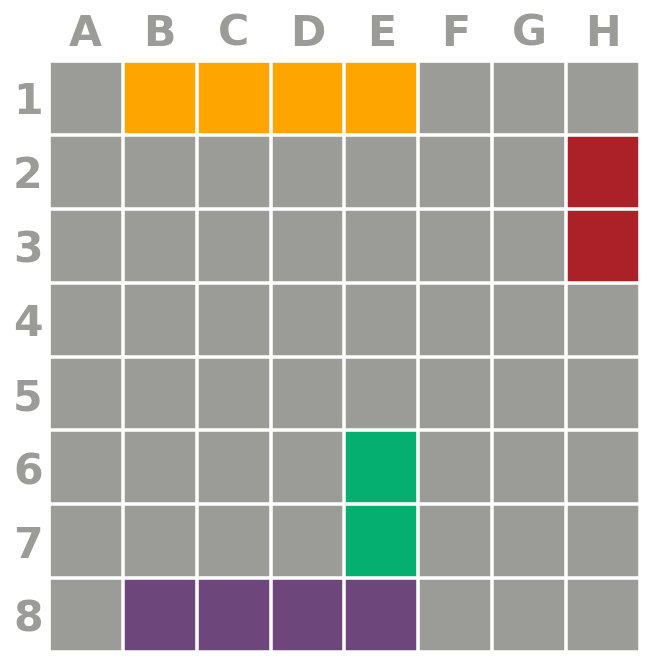

Board ID: 3
[[0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0]
 [0 3 2 0 0 0 0 4]
 [0 3 2 0 0 0 0 4]
 [0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0]]


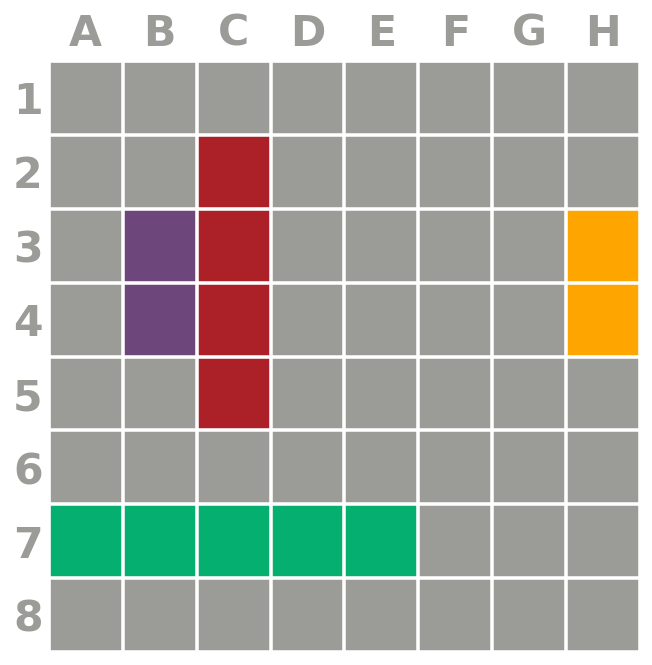

Board ID: 4
[[0 0 0 2 0 0 0 0]
 [0 0 0 2 0 0 3 0]
 [0 0 0 2 0 0 3 0]
 [0 0 0 0 0 0 3 0]
 [0 4 4 4 4 0 3 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


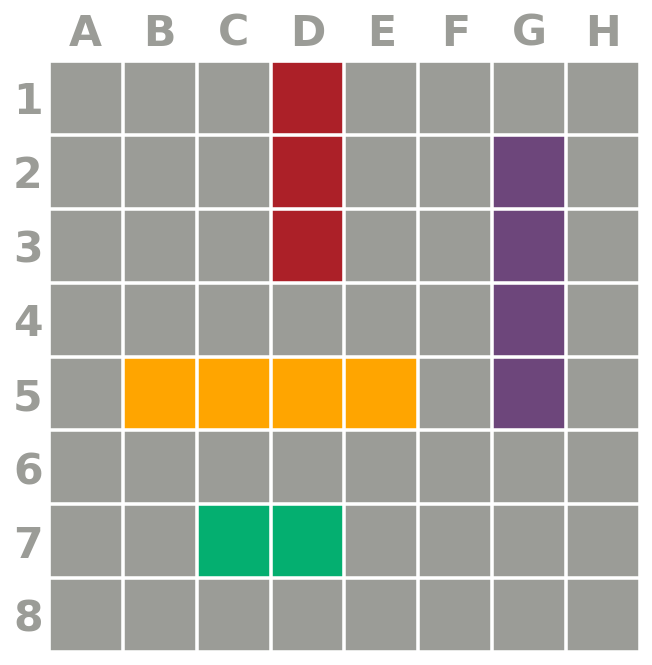

Board ID: 5
[[0 0 3 3 3 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 4 4 4 4 4]
 [0 1 0 0 0 2 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0 0]]


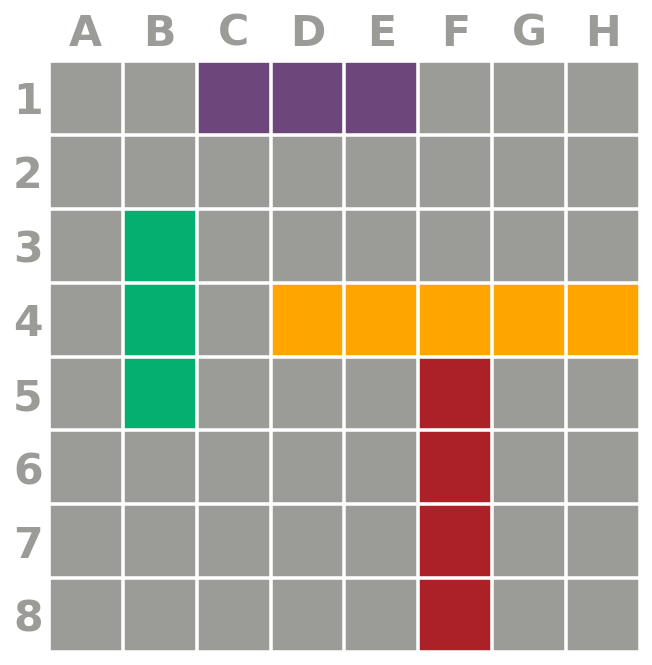

Board ID: 6
[[0 0 0 0 3 3 3 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 1 0 4 4 4 0]
 [0 0 0 0 0 2 2 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


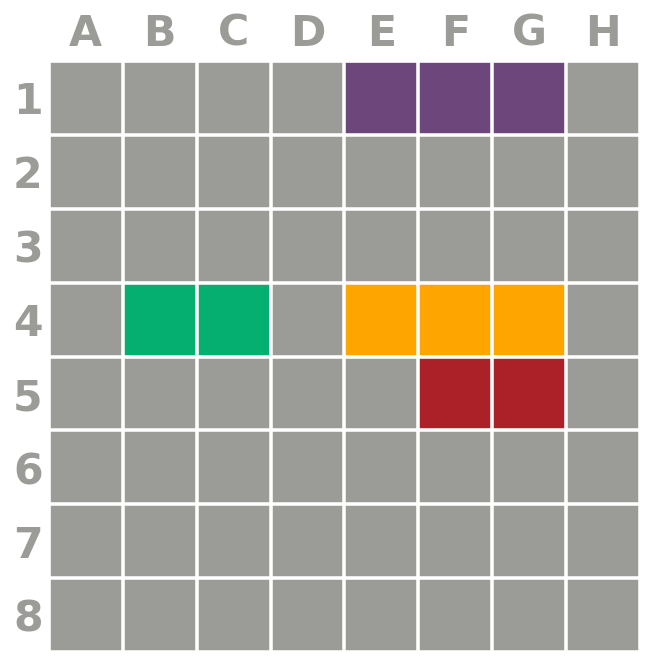

Board ID: 7
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 2 2 2 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 1 3 0 0 0 0]
 [0 4 4 3 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


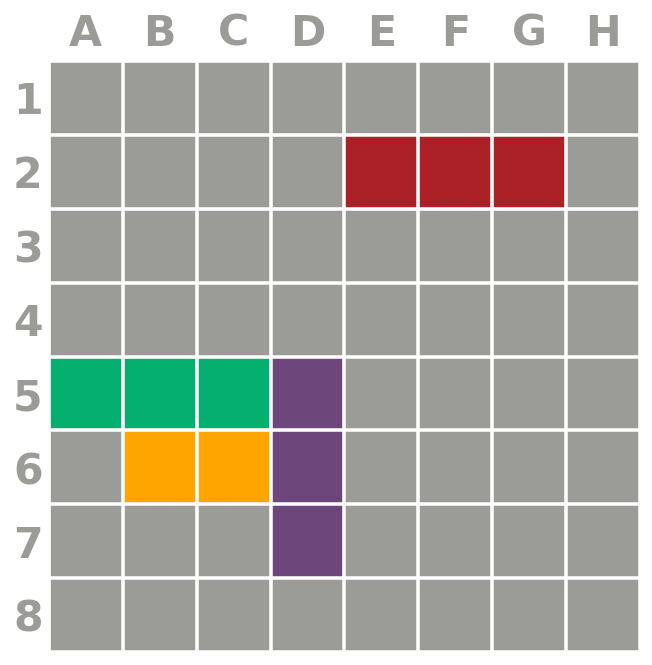

Board ID: 8
[[0 0 0 0 0 0 0 0]
 [0 2 2 2 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 3 3 0 0 0 0]
 [0 1 1 0 4 4 4 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


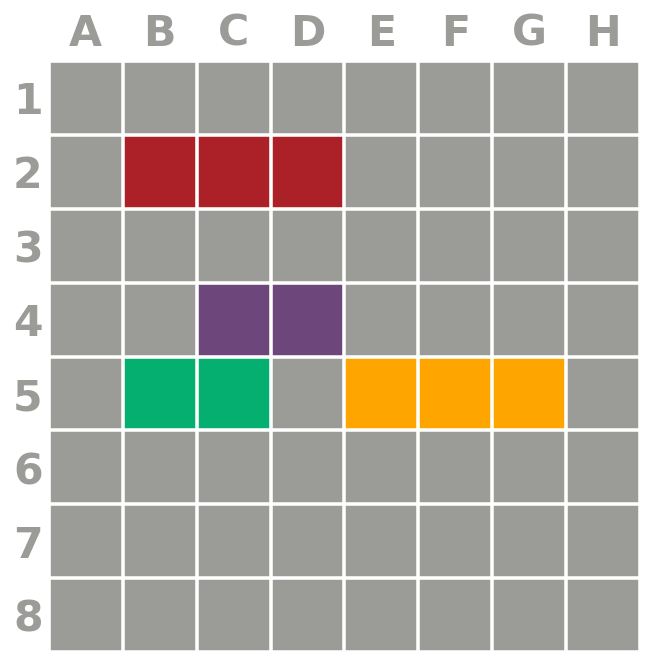

Board ID: 9
[[0 0 0 0 4 4 4 4]
 [0 0 0 0 0 2 0 0]
 [0 0 0 3 0 2 0 0]
 [0 0 0 3 0 2 0 0]
 [0 0 0 3 0 2 0 0]
 [0 0 0 3 0 2 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0]]


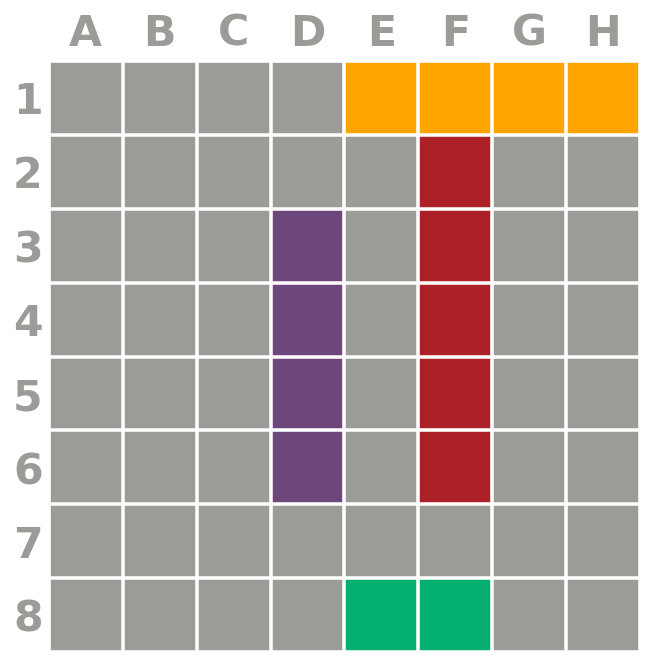

Board ID: 10
[[0 0 0 2 2 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0]
 [3 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 4]]


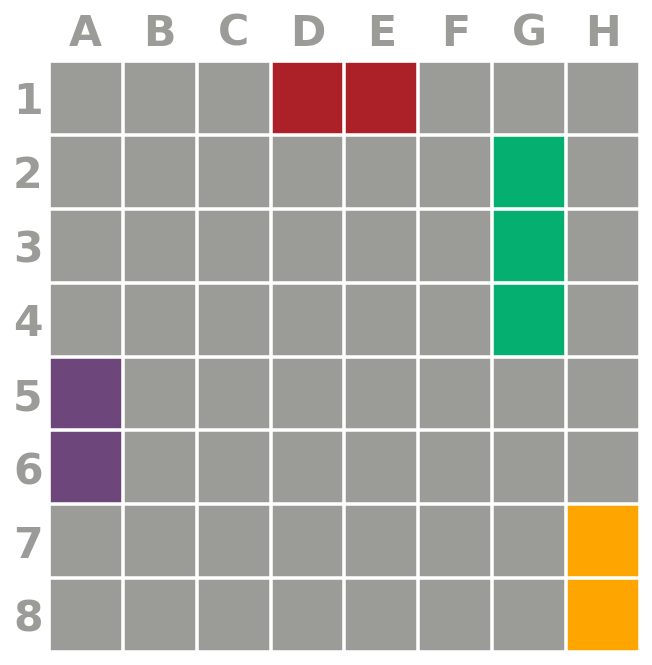

Board ID: 11
[[0 0 0 0 4 0 0 0]
 [0 0 0 0 4 3 0 0]
 [0 0 0 0 4 3 0 0]
 [0 0 0 0 4 0 0 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 0 0]
 [0 0 0 0 0 0 0 0]]


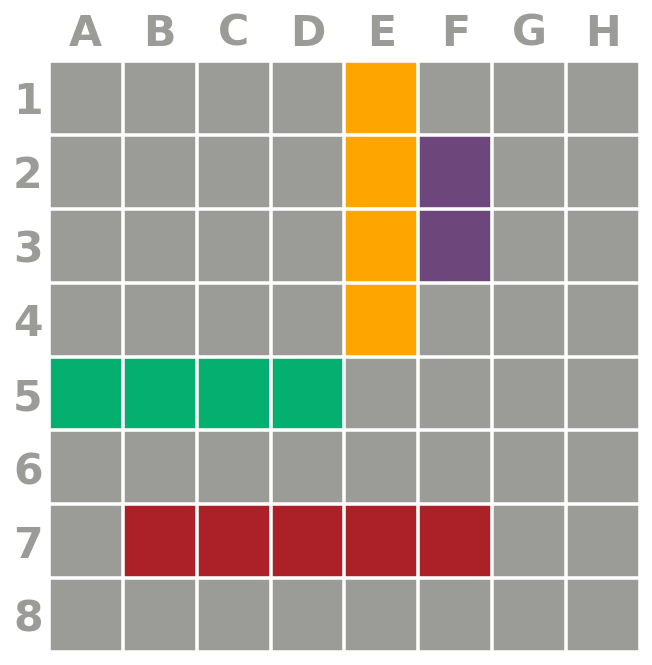

Board ID: 12
[[0 0 4 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0]
 [0 2 2 2 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


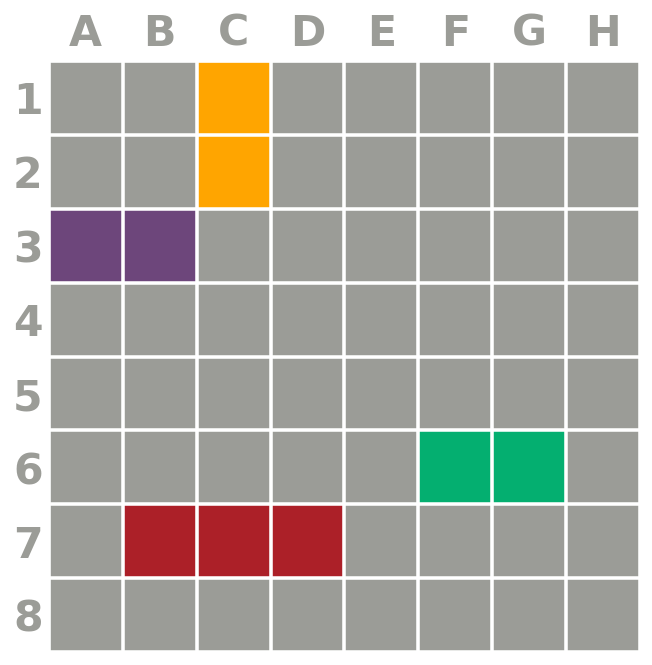

Board ID: 13
[[0 0 0 0 2 2 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0]
 [0 0 0 3 3 3 3 3]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [4 4 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


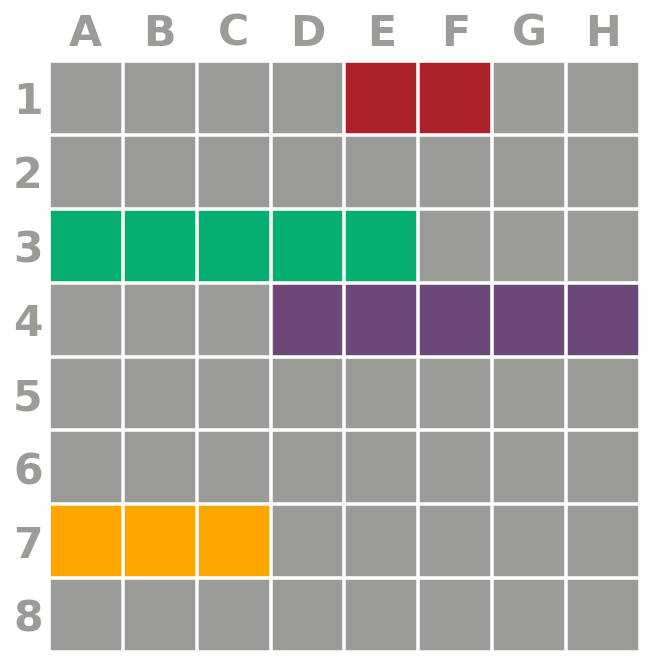

Board ID: 14
[[0 4 4 4 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 2 2 2 2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 3 3 3 3 3 0 0]]


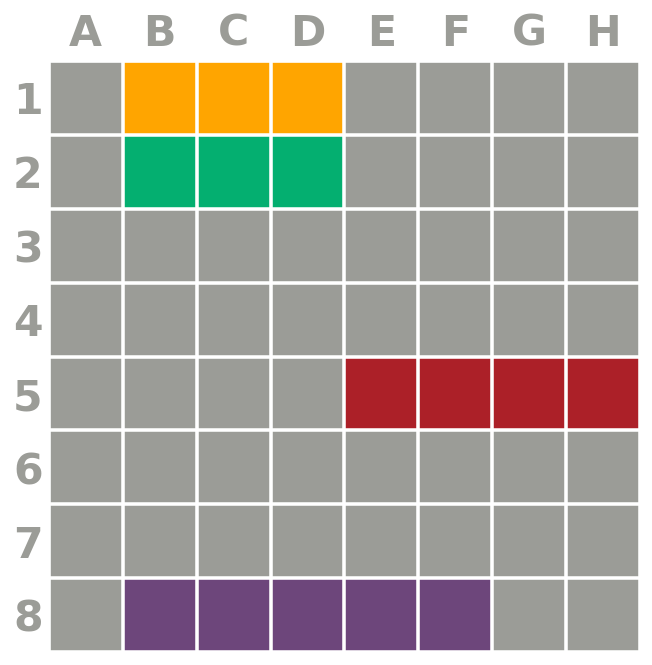

Board ID: 15
[[0 0 0 3 3 3 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 4 2 0 0 0 0]
 [0 0 4 2 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


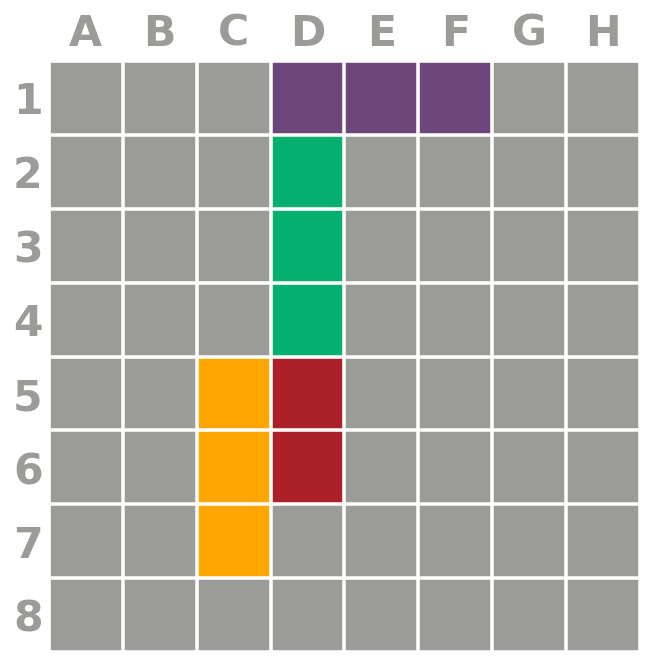

Board ID: 16
[[1 4 4 4 4 4 0 0]
 [1 0 0 0 2 0 0 0]
 [1 0 0 0 2 0 0 0]
 [1 0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 3 3 3 3]]


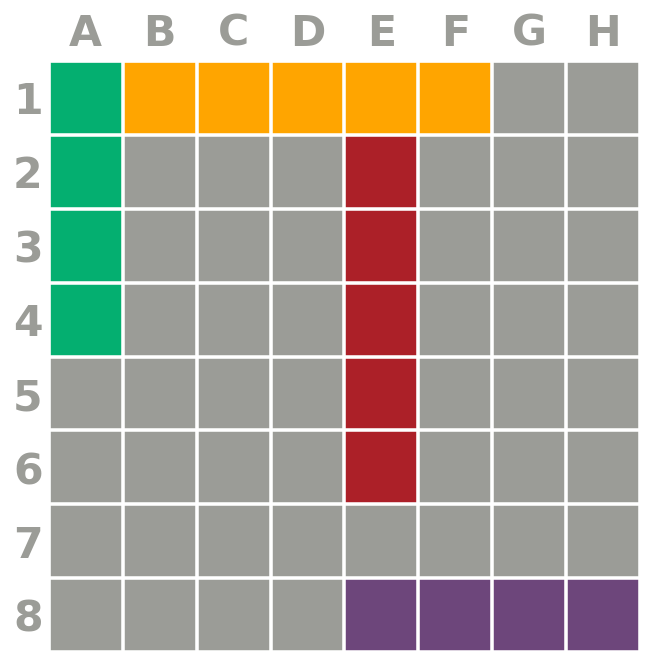

Board ID: 17
[[4 4 4 4 0 0 0 0]
 [0 0 0 1 0 0 0 2]
 [0 0 0 1 0 0 0 2]
 [0 0 0 1 0 0 3 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0]]


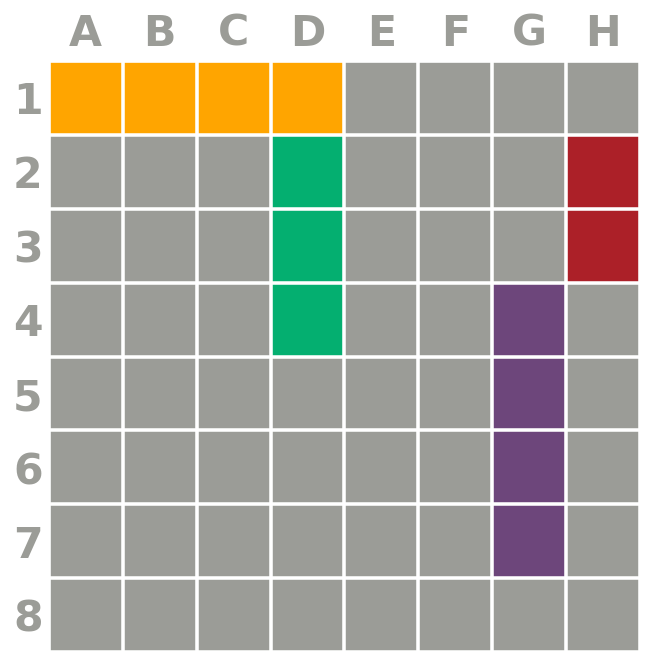

Board ID: 18
[[0 0 0 0 0 0 0 0]
 [1 1 1 1 4 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 2 0 0 3 3 0]
 [0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


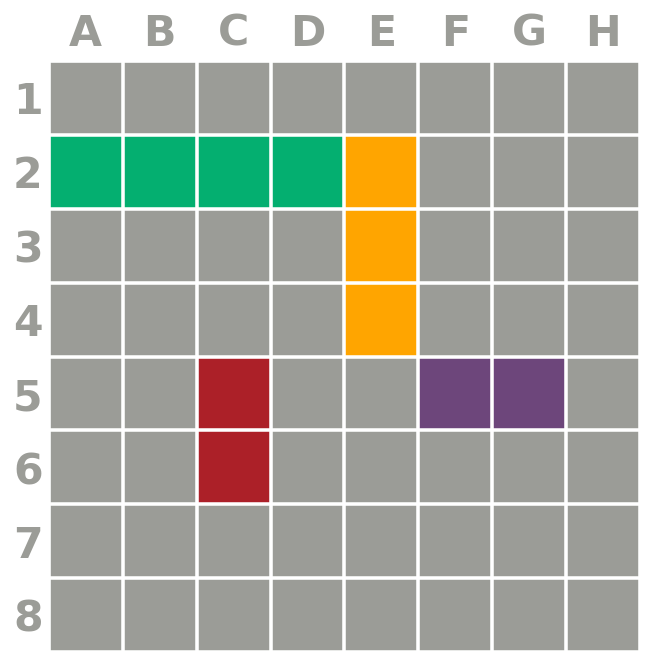

In [81]:
sampler = FastSampler(
    board=BOARD_EMPTY, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS, seed=SEED
)

board_list = []

for i in range(N_BOARDS):
    board = sampler.populate_board()
    board_list.append(board)
    print(f"Board ID: {i+1}")
    print(board.board)
    display(board)

In [89]:
for seed in range(1000):
    rng = np.random.default_rng(seed=seed)

    # Parameters
    num_stimuli = 18
    num_participants = 21
    stimuli_per_participant = 6
    presentations_per_stimulus = 7

    # Step 1: Generate all stimuli
    stimuli = [f"B{i+1:02d}" for i in range(num_stimuli)]

    # Step 2: Create a matrix to track participant-stimulus combinations
    design_matrix = pd.DataFrame(
        index=range(1, num_participants + 1), columns=[f"trial_{i}" for i in range(1, stimuli_per_participant + 1)]
    )

    # Step 3: Randomly assign stimuli ensuring balance
    stimulus_counts = {stim: 0 for stim in stimuli}
    all_combinations = list(combinations(stimuli, stimuli_per_participant))

    # Shuffle combinations to ensure randomness
    # np.random.shuffle(all_combinations)

    for participant in range(1, num_participants + 1):
        rng.shuffle(all_combinations)
        for combo in all_combinations:
            # Check if this combination can be assigned
            if all(stimulus_counts[stim] < presentations_per_stimulus for stim in combo):
                # Assign this combination to the participant
                design_matrix.loc[participant] = rng.permutation(combo)
                for stim in combo:
                    stimulus_counts[stim] += 1
                break

    # Verify the final design
    stimulus_distribution = pd.Series(stimulus_counts)

    if all(stimulus_distribution == presentations_per_stimulus):
        print(f"Design successful for seed {seed}")
        break

Design successful for seed 91


In [90]:
design_matrix

,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6
1,B11,B05,B09,B18,B17,B06
2,B03,B16,B10,B14,B02,B01
3,B04,B03,B12,B01,B14,B08
4,B07,B01,B11,B13,B15,B18
5,B01,B04,B18,B08,B15,B17
6,B13,B04,B08,B16,B05,B12
7,B01,B18,B10,B05,B15,B13
8,B13,B17,B04,B16,B06,B12
9,B06,B09,B10,B08,B16,B03
10,B01,B02,B12,B10,B04,B05


In [91]:
stimulus_distribution

B01    7
B02    7
B03    7
B04    7
B05    7
B06    7
B07    7
B08    7
B09    7
B10    7
B11    7
B12    7
B13    7
B14    7
B15    7
B16    7
B17    7
B18    7
dtype: int64

In [ ]:
# Export the boards and treatments as JSON file
EXPERIMENT_NAME = "battleship-full-v1"

data = {
    "treatments": design_matrix.to_dict(orient="index"),
    "boards": {},
}
for i, b in enumerate(board_list):
    board = b.board
    # Replace 0's with -1's
    board = np.where(board == 0, -1, board)
    data["boards"][f"B{i+1:02d}"] = board.tolist()

with open(f"{EXPERIMENT_NAME}-boards.json", "w") as f:
    json.dump(
        data,
        f,
        indent=4,
    )